**Needed only to run the code on Google colab**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Question 1: Dimensionality Reduction PCA 

In [41]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [42]:

file_path = "/content/drive/MyDrive/Dataset/DA/HW2/url-data.txt"

"""
Use the following 'file_path' variable if running on local machine.
The file 'iris.csv' must be in the same directory as the program file.
O/W change the 'file_path' to the directory where the dataset is stored.
"""

#file_path = "./url-data.txt"

df_data = pd.read_csv(file_path)


Pre-processing data

In [43]:
df_data.dropna()

df_train_data = df_data.iloc[:, 1:]

df_data_scaled = (df_train_data - df_train_data.mean()) / (df_train_data.std())

train_data = df_train_data.values
train_label = df_data.iloc[:, 0].values

df_data_scaled.dropna()
train_data_scaled = StandardScaler().fit_transform(train_data)


print(train_data_scaled)

[[-0.65466981 -0.5912059   0.08517171 ... -0.12874791 -0.16518144
  -0.04476615]
 [ 1.71777468 -0.10030701  1.13667433 ... -0.21184327 -0.16518144
  -0.04476615]
 [-0.21764057  0.71785781 -0.96633091 ... -0.23954172 -0.16518144
  -0.04476615]
 ...
 [-0.46737157 -0.10030701  0.08517171 ... -0.23954172 -0.16518144
  -0.04476615]
 [-0.90440081 -1.08210479 -0.96633091 ... -0.23954172 -0.16518144
  -0.04476615]
 [-0.34250607  0.22695892  0.08517171 ... -0.20261045 -0.16518144
  -0.04476615]]


**PCA for non-scaled data**

In [44]:
pca_full = PCA(n_components=64)
data_reduced = pca_full.fit_transform(train_data)

eigenvalues_full = pca_full.explained_variance_
variance_ratio_full = pca_full.explained_variance_ratio_


**Function for calculating minimum # principle components required from variance ratio**

In [45]:
def calc_min_principle_comp_required(variance_ratio, variance_ratio_threshold):
  
  maintained_variance_ratio = 0.0
  n = 1

  while maintained_variance_ratio < variance_ratio_threshold:

    maintained_variance_ratio = sum(variance_ratio[:n])
    n+=1

  return n-1


Calculating minimum # of principal components for **non-scaled data** from maintained variance ratio

In [46]:
principal_component_count_95 = calc_min_principle_comp_required(variance_ratio_full, 0.95)

principal_component_count_99 = calc_min_principle_comp_required(variance_ratio_full, 0.99)

print("For non-scaled data minimum # principal component required to maintaine 95% variance is : ",  principal_component_count_95)

print()

print("For non-scaled data minimum # principal component required to maintaine 99% variance is : ",  principal_component_count_99)

print()


For non-scaled data minimum # principal component required to maintaine 95% variance is :  14

For non-scaled data minimum # principal component required to maintaine 99% variance is :  23



**PCA for scaled data**

In [47]:
pca_full_scaled = PCA(n_components=64)
data_reduced_scaled = pca_full_scaled.fit_transform(train_data_scaled)

eigenvalues_full_scaled = pca_full_scaled.explained_variance_
variance_ratio_full_scaled = pca_full_scaled.explained_variance_ratio_

Calculating minimum # of principal components for **scaled data** from maintained variance ratio

In [49]:
principal_component_count_scaled_95 = calc_min_principle_comp_required(variance_ratio_full_scaled, 0.95)

principal_component_count_scaled_99 = calc_min_principle_comp_required(variance_ratio_full_scaled, 0.99)

print("For scaled data minimum # principal component required to maintaine 95% variance is : ",  principal_component_count_scaled_95)

print()

print("For scaled data minimum # principal component required to maintaine 99% variance is : ",  principal_component_count_scaled_99)

For scaled data minimum # principal component required to maintaine 95% variance is :  22

For scaled data minimum # principal component required to maintaine 99% variance is :  29


Scree plot for non-scaled data

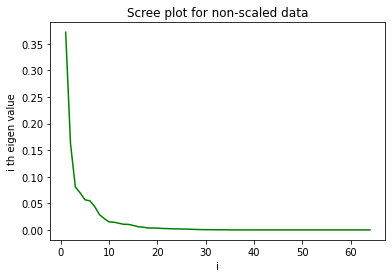

In [50]:
import matplotlib.pyplot as plt

x = list(range(1, 65))

y = variance_ratio_full.tolist()

plt.plot(x, y, color='g')

# naming the x axis
plt.xlabel('i')
# naming the y axis
plt.ylabel("i th eigen value")
 
# giving a title to my graph
plt.title('Scree plot for non-scaled data')
 
# function to show the plot
plt.show()



Scree plot for scaled data

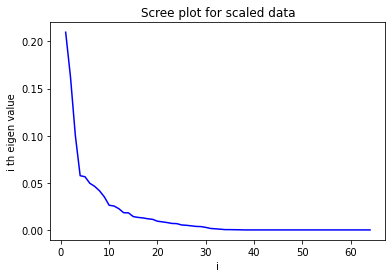

In [51]:
import matplotlib.pyplot as plt

x = list(range(1, 65))

y = variance_ratio_full_scaled.tolist()

plt.plot(x, y, color='b')

# naming the x axis
plt.xlabel('i')
# naming the y axis
plt.ylabel("i th eigen value")
 
# giving a title to my graph
plt.title('Scree plot for scaled data')
 
# function to show the plot
plt.show()